### 导入数据

In [20]:
import pandas as pd
import numpy as np
import torch
from torch import nn

mae_lstm = []
mae_re_lstm = []
mae_ss_lstm = []
for seed in range(100):
    try:
        mae_lstm.append(torch.load(f"loss/mae_deepar_seed{seed}.pt"))
        mae_re_lstm.append(torch.load(f"loss/mae_deepar_re_seed{seed}.pt"))
        mae_ss_lstm.append(torch.load(f"loss/mae_deepar_ss_seed{seed}.pt"))
    except:
        pass
decoder_len = 24
mae_lstm = torch.cat(mae_lstm).reshape(-1, decoder_len)
mae_re_lstm = torch.cat(mae_re_lstm).reshape(-1, decoder_len)
mae_ss_lstm = torch.cat(mae_ss_lstm).reshape(-1, decoder_len)

mae_lstm_mean = mae_lstm.mean(-1)
mae_re_lstm_mean = mae_re_lstm.mean(-1)
mae_ss_lstm_mean = mae_ss_lstm.mean(-1)

index = [0,7,15,23]
mae_lstm = mae_lstm[:, index]
mae_re_lstm = mae_re_lstm[:, index]
mae_ss_lstm = mae_ss_lstm[:, index]


# mae_lstm = mae_lstm.permute(1, 0).reshape(-1)
# mae_re_lstm = mae_re_lstm.permute(1, 0).reshape(-1)
# mae_ss_lstm = mae_ss_lstm.permute(1, 0).reshape(-1)

# horizon = (torch.tensor(index)+1).repeat_interleave(10).repeat(3)
# mae = torch.cat([mae_lstm, mae_ss_lstm, mae_re_lstm])
# method = ['LSTM', 'LSTM-SS', 'LSTM-EF']
# methods = [m for m in method for i in range(len(mae_lstm))]
# data = pd.DataFrame({'mae':mae,
#               'methods':methods,
#               'horizon':horizon
#              }
#             )

In [21]:
mae1 = torch.stack([mae_lstm[:, 0], mae_ss_lstm[:, 0], mae_re_lstm[:, 0]], 0)
mae2 = torch.stack([mae_lstm[:, 1], mae_ss_lstm[:, 1], mae_re_lstm[:, 1]], 0)
mae3 = torch.stack([mae_lstm[:, 2], mae_ss_lstm[:, 2], mae_re_lstm[:, 2]], 0)
mae4 = torch.stack([mae_lstm[:, 3], mae_ss_lstm[:, 3], mae_re_lstm[:, 3]], 0)
mae_mean = torch.stack([mae_lstm_mean, mae_ss_lstm_mean, mae_re_lstm_mean], 0)

In [29]:
from scipy import stats

print('前向1步：EF-SS', stats.ttest_1samp(mae1[2,:] - mae1[1,:], 0, alternative="less"))
print('前向1步：EF-OR', stats.ttest_1samp(mae1[2,:] - mae1[0,:], 0, alternative="less"))
print('前向1步：SS-OR', stats.ttest_1samp(mae1[1,:] - mae1[0,:], 0, alternative="less"))

print('前向8步：EF-SS', stats.ttest_1samp(mae2[2,:] - mae2[1,:], 0, alternative="less"))
print('前向8步：EF-OR', stats.ttest_1samp(mae2[2,:] - mae2[0,:], 0, alternative="less"))
print('前向8步：SS-OR', stats.ttest_1samp(mae2[0,:] - mae2[1,:], 0, alternative="less"))

print('前向16步：EF-SS', stats.ttest_1samp(mae3[2,:] - mae3[1,:], 0, alternative="less"))
print('前向16步：EF-OR', stats.ttest_1samp(mae3[2,:] - mae3[0,:], 0, alternative="less"))
print('前向16步：SS-OR', stats.ttest_1samp(mae3[0,:] - mae3[1,:], 0, alternative="less"))

print('前向24步：EF-SS', stats.ttest_1samp(mae4[2,:] - mae4[1,:], 0, alternative="less"))
print('前向24步：EF-OR', stats.ttest_1samp(mae4[2,:] - mae4[0,:], 0, alternative="less"))
print('前向24步：SS-OR', stats.ttest_1samp(mae4[0,:] - mae4[1,:], 0, alternative="less"))

print('前向1-24步：EF-SS', stats.ttest_1samp(mae_mean[2,:] - mae_mean[1,:], 0, alternative="less"))
print('前向1-24步：EF-OR', stats.ttest_1samp(mae_mean[2,:] - mae_mean[0,:], 0, alternative="less"))
print('前向1-24步：SS-OR', stats.ttest_1samp(mae_mean[1,:] - mae_mean[0,:], 0, alternative="less"))

前向1步：EF-SS TtestResult(statistic=0.643698712525516, pvalue=0.7349124728552654, df=14)
前向1步：EF-OR TtestResult(statistic=3.304965163778109, pvalue=0.9973947230358952, df=14)
前向1步：SS-OR TtestResult(statistic=0.7112641464142749, pvalue=0.7556986235761858, df=14)
前向8步：EF-SS TtestResult(statistic=-2.5671753219901503, pvalue=0.011179791010527755, df=14)
前向8步：EF-OR TtestResult(statistic=-3.9661157719416913, pvalue=0.0007032634290198193, df=14)
前向8步：SS-OR TtestResult(statistic=-1.2595215714132617, pvalue=0.11421794439747886, df=14)
前向16步：EF-SS TtestResult(statistic=-1.9712408308524714, pvalue=0.03439695184328857, df=14)
前向16步：EF-OR TtestResult(statistic=-2.501456737561451, pvalue=0.012697544957106366, df=14)
前向16步：SS-OR TtestResult(statistic=-1.3493025543428552, pvalue=0.09932890834355958, df=14)
前向24步：EF-SS TtestResult(statistic=-2.338942142523265, pvalue=0.017343223095984826, df=14)
前向24步：EF-OR TtestResult(statistic=-3.6647298799448365, pvalue=0.0012746699213022328, df=14)
前向24步：SS-OR TtestRe

In [30]:
print('前向1步：EF-SS', stats.ttest_rel(mae1[2,:], mae1[1,:]))
print('前向1步：EF-OR', stats.ttest_rel(mae1[2,:], mae1[0,:]))
print('前向1步：SS-OR', stats.ttest_rel(mae1[0,:], mae1[1,:]))

print('前向8步：EF-SS', stats.ttest_rel(mae2[2,:], mae1[1,:]))
print('前向8步：EF-OR', stats.ttest_rel(mae2[2,:], mae1[0,:]))
print('前向8步：SS-OR', stats.ttest_rel(mae2[0,:], mae1[1,:]))

print('前向16步：EF-SS', stats.ttest_rel(mae3[2,:], mae1[1,:]))
print('前向16步：EF-OR', stats.ttest_rel(mae3[2,:], mae1[0,:]))
print('前向16步：SS-OR', stats.ttest_rel(mae3[0,:], mae1[1,:]))

print('前向24步：EF-SS', stats.ttest_rel(mae4[2,:], mae1[1,:]))
print('前向24步：EF-OR', stats.ttest_rel(mae4[2,:], mae1[0,:]))
print('前向24步：SS-OR', stats.ttest_rel(mae4[0,:], mae1[1,:]))

print('前向1-24步：EF-SS', stats.ttest_rel(mae_mean[2,:], mae_mean[1,:]))
print('前向1-24步：EF-OR', stats.ttest_rel(mae_mean[2,:], mae_mean[0,:]))
print('前向1-24步：SS-OR', stats.ttest_rel(mae_mean[0,:], mae_mean[1,:]))

前向1步：EF-SS TtestResult(statistic=0.6436987436211663, pvalue=0.5301750347060403, df=14)
前向1步：EF-OR TtestResult(statistic=3.3049652315671856, pvalue=0.005210553225403322, df=14)
前向1步：SS-OR TtestResult(statistic=-0.7112641334937807, pvalue=0.48860276060735486, df=14)
前向8步：EF-SS TtestResult(statistic=36.98882376254614, pvalue=2.3015472831199995e-15, df=14)
前向8步：EF-OR TtestResult(statistic=39.64566997563465, pvalue=8.790402916762265e-16, df=14)
前向8步：SS-OR TtestResult(statistic=38.42605075899596, pvalue=1.3563341394047872e-15, df=14)
前向16步：EF-SS TtestResult(statistic=39.51432546078257, pvalue=9.204874437865982e-16, df=14)
前向16步：EF-OR TtestResult(statistic=36.113101275666374, pvalue=3.2083622269752753e-15, df=14)
前向16步：SS-OR TtestResult(statistic=48.04099722656995, pvalue=6.084413846529058e-17, df=14)
前向24步：EF-SS TtestResult(statistic=37.389981527550084, pvalue=1.9817548461889903e-15, df=14)
前向24步：EF-OR TtestResult(statistic=34.144037075436295, pvalue=6.9757709499489946e-15, df=14)
前向24步：SS-O

### r-risk检验

In [34]:
mae_lstm = []
mae_re_lstm = []
mae_ss_lstm = []
for seed in range(100):
    try:
        mae_lstm.append(torch.load(f"loss/qloss_deepar_seed{seed}.pt"))
        mae_re_lstm.append(torch.load(f"loss/qloss_deepar_re_seed{seed}.pt"))
        mae_ss_lstm.append(torch.load(f"loss/qloss_deepar_ss_seed{seed}.pt"))
    except:
        pass
decoder_len = 24
mae_lstm = torch.cat(mae_lstm).reshape(-1, decoder_len)
mae_re_lstm = torch.cat(mae_re_lstm).reshape(-1, decoder_len)
mae_ss_lstm = torch.cat(mae_ss_lstm).reshape(-1, decoder_len)

mae_lstm_mean = mae_lstm.mean(-1)
mae_re_lstm_mean = mae_re_lstm.mean(-1)
mae_ss_lstm_mean = mae_ss_lstm.mean(-1)

index = [0,7,15,23]
mae_lstm = mae_lstm[:, index]
mae_re_lstm = mae_re_lstm[:, index]
mae_ss_lstm = mae_ss_lstm[:, index]


# mae_lstm = mae_lstm.permute(1, 0).reshape(-1)
# mae_re_lstm = mae_re_lstm.permute(1, 0).reshape(-1)
# mae_ss_lstm = mae_ss_lstm.permute(1, 0).reshape(-1)

# horizon = (torch.tensor(index)+1).repeat_interleave(10).repeat(3)
# mae = torch.cat([mae_lstm, mae_ss_lstm, mae_re_lstm])
# method = ['LSTM', 'LSTM-SS', 'LSTM-EF']
# methods = [m for m in method for i in range(len(mae_lstm))]
# data = pd.DataFrame({'mae':mae,
#               'methods':methods,
#               'horizon':horizon
#              }
#             )

mae1 = torch.stack([mae_lstm[:, 0], mae_ss_lstm[:, 0], mae_re_lstm[:, 0]], 0)
mae2 = torch.stack([mae_lstm[:, 1], mae_ss_lstm[:, 1], mae_re_lstm[:, 1]], 0)
mae3 = torch.stack([mae_lstm[:, 2], mae_ss_lstm[:, 2], mae_re_lstm[:, 2]], 0)
mae4 = torch.stack([mae_lstm[:, 3], mae_ss_lstm[:, 3], mae_re_lstm[:, 3]], 0)
mae_mean = torch.stack([mae_lstm_mean, mae_ss_lstm_mean, mae_re_lstm_mean], 0)

In [39]:
mae4[2,:] - mae4[0,:] 

tensor([-35.4992,  -1.5562,  -2.8683,  -4.2531, -14.3385,  -8.9962, -40.0735,
        -16.2217,   6.7260, -23.3049,  -5.5773,  -1.3203,  -6.7727, -11.8783,
        -16.0975])

In [32]:
from scipy import stats

print('前向1步：EF-SS', stats.ttest_1samp(mae1[1,:] - mae1[2,:], 0, alternative="less"))
print('前向1步：EF-OR', stats.ttest_1samp(mae1[0,:] - mae1[2,:], 0, alternative="less"))
print('前向1步：SS-OR', stats.ttest_1samp(mae1[0,:] - mae1[1,:], 0, alternative="less"))

print('前向8步：EF-SS', stats.ttest_1samp(mae2[2,:] - mae2[1,:], 0, alternative="less"))
print('前向8步：EF-OR', stats.ttest_1samp(mae2[2,:] - mae2[0,:], 0, alternative="less"))
print('前向8步：SS-OR', stats.ttest_1samp(mae2[1,:] - mae2[0,:], 0, alternative="less"))

print('前向16步：EF-SS', stats.ttest_1samp(mae3[2,:] - mae3[1,:], 0, alternative="less"))
print('前向16步：EF-OR', stats.ttest_1samp(mae3[2,:] - mae3[0,:], 0, alternative="less"))
print('前向16步：SS-OR', stats.ttest_1samp(mae3[1,:] - mae3[0,:], 0, alternative="less"))

print('前向24步：EF-SS', stats.ttest_1samp(mae4[2,:] - mae4[1,:], 0, alternative="less"))
print('前向24步：EF-OR', stats.ttest_1samp(mae4[2,:] - mae4[0,:], 0, alternative="less"))
print('前向24步：SS-OR', stats.ttest_1samp(mae4[1,:] - mae4[0,:], 0, alternative="less"))

print('前向1-24步：EF-SS', stats.ttest_1samp(mae_mean[2,:] - mae_mean[1,:], 0, alternative="less"))
print('前向1-24步：EF-OR', stats.ttest_1samp(mae_mean[2,:] - mae_mean[0,:], 0, alternative="less"))
print('前向1-24步：SS-OR', stats.ttest_1samp(mae_mean[0,:] - mae_mean[1,:], 0, alternative="less"))

前向1步：EF-SS TtestResult(statistic=-0.643698712525516, pvalue=0.26508752714473455, df=14)
前向1步：EF-OR TtestResult(statistic=-3.304965163778109, pvalue=0.002605276964104906, df=14)
前向1步：SS-OR TtestResult(statistic=-0.7112641464142749, pvalue=0.24430137642381428, df=14)
前向8步：EF-SS TtestResult(statistic=-2.5671753219901503, pvalue=0.011179791010527755, df=14)
前向8步：EF-OR TtestResult(statistic=-3.9661157719416913, pvalue=0.0007032634290198193, df=14)
前向8步：SS-OR TtestResult(statistic=1.2595215714132617, pvalue=0.8857820556025212, df=14)
前向16步：EF-SS TtestResult(statistic=-1.9712408308524714, pvalue=0.03439695184328857, df=14)
前向16步：EF-OR TtestResult(statistic=-2.501456737561451, pvalue=0.012697544957106366, df=14)
前向16步：SS-OR TtestResult(statistic=1.3493025543428552, pvalue=0.9006710916564404, df=14)
前向24步：EF-SS TtestResult(statistic=-2.338942142523265, pvalue=0.017343223095984826, df=14)
前向24步：EF-OR TtestResult(statistic=-3.6647298799448365, pvalue=0.0012746699213022328, df=14)
前向24步：SS-OR Ttes

In [33]:
print('前向1步：EF-SS', stats.ttest_rel(mae1[2,:], mae1[1,:]))
print('前向1步：EF-OR', stats.ttest_rel(mae1[2,:], mae1[0,:]))
print('前向1步：SS-OR', stats.ttest_rel(mae1[0,:], mae1[1,:]))

print('前向8步：EF-SS', stats.ttest_rel(mae2[2,:], mae1[1,:]))
print('前向8步：EF-OR', stats.ttest_rel(mae2[2,:], mae1[0,:]))
print('前向8步：SS-OR', stats.ttest_rel(mae2[0,:], mae1[1,:]))

print('前向16步：EF-SS', stats.ttest_rel(mae3[2,:], mae1[1,:]))
print('前向16步：EF-OR', stats.ttest_rel(mae3[2,:], mae1[0,:]))
print('前向16步：SS-OR', stats.ttest_rel(mae3[0,:], mae1[1,:]))

print('前向24步：EF-SS', stats.ttest_rel(mae4[2,:], mae1[1,:]))
print('前向24步：EF-OR', stats.ttest_rel(mae4[2,:], mae1[0,:]))
print('前向24步：SS-OR', stats.ttest_rel(mae4[0,:], mae1[1,:]))

print('前向1-24步：EF-SS', stats.ttest_rel(mae_mean[2,:], mae_mean[1,:]))
print('前向1-24步：EF-OR', stats.ttest_rel(mae_mean[2,:], mae_mean[0,:]))
print('前向1-24步：SS-OR', stats.ttest_rel(mae_mean[0,:], mae_mean[1,:]))

前向1步：EF-SS TtestResult(statistic=0.6436987436211663, pvalue=0.5301750347060403, df=14)
前向1步：EF-OR TtestResult(statistic=3.3049652315671856, pvalue=0.005210553225403322, df=14)
前向1步：SS-OR TtestResult(statistic=-0.7112641334937807, pvalue=0.48860276060735486, df=14)
前向8步：EF-SS TtestResult(statistic=36.98882376254614, pvalue=2.3015472831199995e-15, df=14)
前向8步：EF-OR TtestResult(statistic=39.64566997563465, pvalue=8.790402916762265e-16, df=14)
前向8步：SS-OR TtestResult(statistic=38.42605075899596, pvalue=1.3563341394047872e-15, df=14)
前向16步：EF-SS TtestResult(statistic=39.51432546078257, pvalue=9.204874437865982e-16, df=14)
前向16步：EF-OR TtestResult(statistic=36.113101275666374, pvalue=3.2083622269752753e-15, df=14)
前向16步：SS-OR TtestResult(statistic=48.04099722656995, pvalue=6.084413846529058e-17, df=14)
前向24步：EF-SS TtestResult(statistic=37.389981527550084, pvalue=1.9817548461889903e-15, df=14)
前向24步：EF-OR TtestResult(statistic=34.144037075436295, pvalue=6.9757709499489946e-15, df=14)
前向24步：SS-O

### 独立t检验

In [260]:
from scipy import stats
from scipy import stats
import numpy as np
 
#单样本t检验
sample=[809, 1250, 689, 1541, 995, 1234, 1024, 920, 777, 2510,
        2301, 540, 850, 895, 1024, 1000, 1025, 863, 875, 1105]
sample = np.asarray(sample)
m = np.mean(sample)
std = np.std(sample, ddof=1)
print("样本均值:",m)
print(np.std(sample))
print((m - 1200)/(std/np.sqrt(len(sample))))
      
r = stats.ttest_1samp(sample, 1200, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

样本均值: 1111.35
480.43410318169543
-0.8043067483882222
statistic: -0.8043067483882222
pvalue: 0.43116914845890564


[Text(0.5, 0, 'Horizon 1'), Text(0, 0.5, 'MAE')]

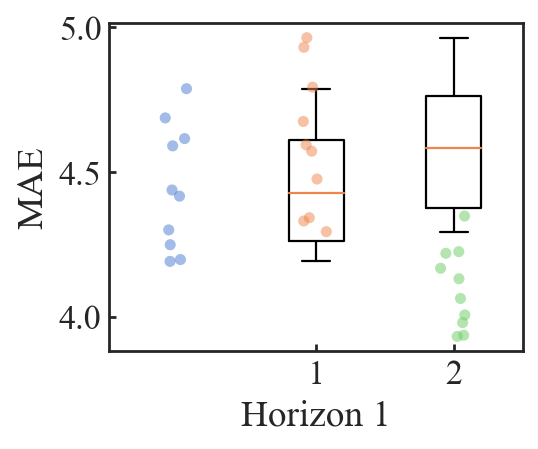

In [242]:
config = {
"font.family":'serif',  
"font.size": 10,       #14 放大是16
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
"xtick.major.size": 3,
"ytick.major.size": 3,
#"font.serif": ['SimSun'],
"font.family":"times new roman",
}
rcParams.update(config)
fig, ax = plt.subplots(dpi=160, figsize=(5/1.5, 4/1.5))   
ax.boxplot(x=mae1, whis=1.5, widths=0.4)

sns.stripplot(x='maex', y='mae1',data=data, hue='maex', palette=sns.color_palette("muted")[0:3],
             alpha=.5, zorder=4, legend=False, ax=ax)

# ax.axes.xaxis.set_ticklabels([])
ax.set(xlabel="Horizon 1", ylabel="MAE")


## Seaborn 绘制箱线图

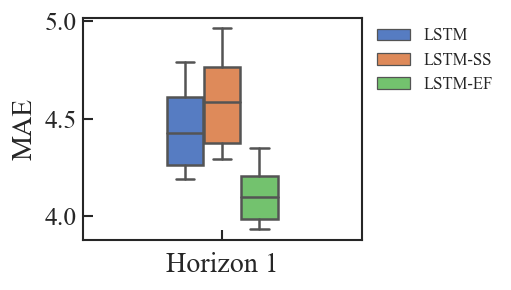

In [162]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


config = {
"mathtext.fontset":'stix',
"xtick.direction":"in",
"xtick.major.size": 6,
"ytick.direction":"in",
"ytick.major.size": 6,
'legend.frameon':False,
"font.family":"times new roman",
}

# Apply the default theme
sns.set_theme(context='notebook', style="ticks", palette=sns.color_palette("muted"), font_scale=1.4, rc=config)


g = sns.boxplot(
    x='horizon', y='mae', data=data[data['horizon']==1],
    hue='methods',
    saturation=0.8,
    width=0.4,
    linewidth=1.5

)
scale = 0.6
g.figure.set_size_inches(5*scale,4*scale)
g.figure.dpi = 120
sns.despine(top=False, right=False, left=False, bottom=False)
g.axes.xaxis.set_ticklabels([])
g.set(xlabel="Horizon 1", ylabel="MAE")
g.legend(frameon=False, fontsize = 10, bbox_to_anchor=(1.001, 1.02))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')

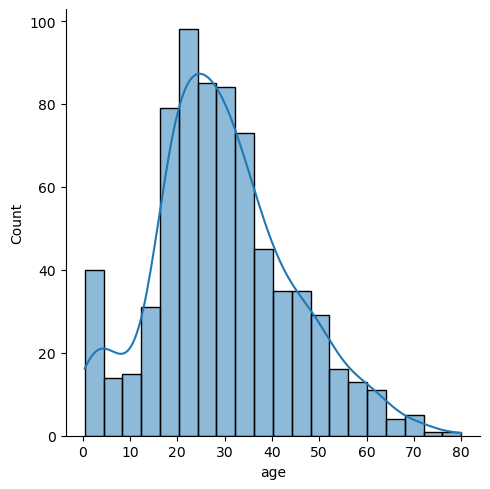

In [10]:
#去除'age'中的缺失值，distplot不能处理缺失数据
age1=titanic['age'].dropna()
sns.displot(age1, kde=True)

<Axes: xlabel='class', ylabel='age'>

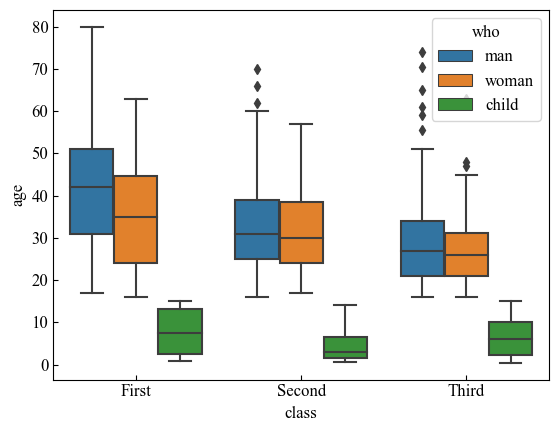

In [18]:
from matplotlib import rcParams

config = {
"font.family":'serif',  
"font.size": 12,       #14 放大是16
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
"font.serif": ['SimSun'],
"font.family":"times new roman",
}
rcParams.update(config)

sns.boxplot(x='class',y='age',hue='who',data=titanic)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcPara

config = {
"font.family":'serif',  
"font.size": 12,       #14 放大是16
"mathtext.fontset":'stix',
"xtick.direction":"in",
"ytick.direction":"in",
"font.serif": ['SimSun'],
"font.family":"times new roman",
}
rcParams.update(config)
color_list = plt.cm.tab10(np.linspace(0, 1, 12))